In [ ]:
!pip install pandas
!pip install requests
!pip install matplotlib

In [ ]:
#When you run, please choose file "Hotel Booking.csv"

from google.colab import files

uploaded = files.upload()

Saving Hotel Booking.csv to Hotel Booking.csv


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime

# Update 'filename.csv' with the correct file name after uploading
file_path = 'Hotel Booking.csv'

In [ ]:
# Read CSV into DataFrame
Hotel_df = pd.read_csv(file_path)

In [ ]:
Hotel_df.head()

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email
0,Cherry,14232570,8/8/2019 00:00,8/9/2019 00:00,1,5931.74,THB,Direct,China,NaN,Barnes,NaN
1,Cherry,14321242,8/9/2019 00:00,8/10/2019 00:00,1,5545.02,THB,Direct,China,NaN,Baker,NaN
2,Cherry,14308935,8/14/2019 0:00,8/15/2019 0:00,1,5545.02,THB,Direct,China,NaN,Parker,NaN
3,Cherry,13921904,9/30/2019 0:00,10/1/2019 00:00,1,8880.35,THB,Direct,China,NaN,Murray,NaN
4,Cherry,13921944,9/30/2019 0:00,10/1/2019 00:00,1,8880.35,THB,Direct,China,NaN,Hines,NaN


In [ ]:
# Convert date columns to datetime

Hotel_df['ArrivalDate'] = pd.to_datetime(Hotel_df['ArrivalDate'])
Hotel_df['DepartureDate'] = pd.to_datetime(Hotel_df['DepartureDate'])

In [ ]:
#To see the head of data
Hotel_df.head()

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,NaN,Barnes,NaN
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,NaN,Baker,NaN
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,NaN,Parker,NaN
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Murray,NaN
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Hines,NaN


In [ ]:
print(Hotel_df.dtypes)

Hotelname                object
reservationno             int64
ArrivalDate      datetime64[ns]
DepartureDate    datetime64[ns]
RoomNights                int64
RoomRevenue             float64
CurrencyCode             object
Channel                  object
Guest Region             object
firstname                object
lastname                 object
Guest Email              object
dtype: object


In [ ]:
# To see max and min in year to see which year to extract currency conversion
#'DepartureDate' column containing datetime values

min_date = Hotel_df['DepartureDate'].min()
max_date = Hotel_df['DepartureDate'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2019-01-02 00:00:00
Maximum Date: 2022-12-31 00:00:00


In [ ]:
# Extract the year from DepartureDate to double check the year in Departure date
Hotel_df['DepartureYear'] = Hotel_df['DepartureDate'].dt.year

# Count the unique years
unique_years = Hotel_df['DepartureYear'].nunique()

# Get the list of unique departure years
unique_years_list = Hotel_df['DepartureYear'].unique()


print(f"There are {unique_years} unique departure years in the dataset.")
print(f"The unique departure years are: {unique_years_list}")

There are 2 unique departure years in the dataset.
The unique departure years are: [2019 2022]


In [ ]:
import requests
#Extract rates from API year 2022 USD to THB

url = "https://api.apilayer.com/exchangerates_data/timeseries"

start_date = "2022-01-01"
end_date = "2022-12-31"

payload = {
    "start_date": start_date,
    "end_date": end_date,
    "base": "USD",
    "symbols": "THB"
}

headers = {
    "apikey": "e71NqXnlqsxjJyH12eoOWtDd9NPvWXDJ"
}

response = requests.get(url, headers=headers, params=payload)

status_code = response.status_code
result = response.json()

if status_code == 200:
    # Extract rates into a DataFrame
    rates_df = pd.DataFrame(result["rates"]).T
    rates_df.index.name = "Date"

    # Display or further process rates_df as needed
    print(rates_df)
else:
    print(f"Failed to retrieve data. Status code: {status_code}")

                  THB
Date                 
2022-01-01  33.195038
2022-01-02  33.250109
2022-01-03  33.275502
2022-01-04  33.249499
2022-01-05  33.249503
...               ...
2022-12-27  34.629814
2022-12-28  34.720567
2022-12-29  34.574499
2022-12-30  34.580369
2022-12-31  34.580369

[365 rows x 1 columns]


In [ ]:
# Extract rates into a DataFrame
rates2022_df = pd.DataFrame(result["rates"]).T
rates2022_df.index.name = "Date"

# Save the DataFrame as '2022rates.csv'
rates_df.to_csv('2022rates.csv')
print("Data saved as '2022rates.csv'")

Data saved as '2022rates.csv'


In [ ]:
rates2022_df.head()

,THB
Date,
2022-01-01,33.195038
2022-01-02,33.250109
2022-01-03,33.275502
2022-01-04,33.249499
2022-01-05,33.249503


In [ ]:
#Extract rates from API year 2019 USD to THB

url = "https://api.apilayer.com/exchangerates_data/timeseries"

start_date = "2019-01-01"
end_date = "2019-12-31"

payload = {
    "start_date": start_date,
    "end_date": end_date,
    "base": "USD",
    "symbols": "THB"
}

headers = {
    "apikey": "e71NqXnlqsxjJyH12eoOWtDd9NPvWXDJ"
}

response = requests.get(url, headers=headers, params=payload)

status_code = response.status_code
result = response.json()

if status_code == 200:
    # Extract rates into a DataFrame
    rates_df = pd.DataFrame(result["rates"]).T
    rates_df.index.name = "Date"

    # Display or further process rates_df as needed
    print(rates_df)
else:
    print(f"Failed to retrieve data. Status code: {status_code}")

                  THB
Date                 
2019-01-01  32.347503
2019-01-02  32.280218
2019-01-03  32.180145
2019-01-04  31.969038
2019-01-05  31.969038
...               ...
2019-12-27  30.157038
2019-12-28  30.157038
2019-12-29  30.159952
2019-12-30  29.979595
2019-12-31  29.689357

[365 rows x 1 columns]


In [ ]:
# Extract 2019rates into a DataFrame
rates2019_df = pd.DataFrame(result["rates"]).T
rates2019_df.index.name = "Date"

# Save the DataFrame as '2020rates.csv'
rates_df.to_csv('2019rates.csv')
print("Data saved as '2019rates.csv'")

Data saved as '2019rates.csv'


In [ ]:
rates2019_df.head()

,THB
Date,
2019-01-01,32.347503
2019-01-02,32.280218
2019-01-03,32.180145
2019-01-04,31.969038
2019-01-05,31.969038


In [ ]:

# rates2019_df, rates2022_df are DataFrames

# Concatenate DataFrames while adding keys to identify each DataFrame
combined_rates_df = pd.concat([rates2019_df, rates2022_df], axis= 0)

combined_rates_df

,THB
Date,
2019-01-01,32.347503
2019-01-02,32.280218
2019-01-03,32.180145
2019-01-04,31.969038
2019-01-05,31.969038
...,...
2022-12-27,34.629814
2022-12-28,34.720567
2022-12-29,34.574499


In [ ]:
#Change index to column
combined_rates_df.reset_index(drop=False, inplace=True)

combined_rates_df

,Date,THB
0,2019-01-01,32.347503
1,2019-01-02,32.280218
2,2019-01-03,32.180145
3,2019-01-04,31.969038
4,2019-01-05,31.969038
...,...,...
725,2022-12-27,34.629814
726,2022-12-28,34.720567
727,2022-12-29,34.574499
728,2022-12-30,34.580369


In [ ]:
#Change Date column name to 'DepartureDate' in order to do Left join with Main Table
combined_rates_df.rename(columns={'Date':'DepartureDate'}, inplace=True)
combined_rates_df

,DepartureDate,THB
0,2019-01-01,32.347503
1,2019-01-02,32.280218
2,2019-01-03,32.180145
3,2019-01-04,31.969038
4,2019-01-05,31.969038
...,...,...
725,2022-12-27,34.629814
726,2022-12-28,34.720567
727,2022-12-29,34.574499
728,2022-12-30,34.580369


In [ ]:
combined_rates_df['DepartureDate'] = pd.to_datetime(combined_rates_df['DepartureDate'])

In [ ]:
#Save File Combined_rates_df
#Save DataFrame to CSV file

combined_rates_df.to_csv('combined_rates_df.csv', index=False)


In [ ]:
from google.colab import files

# Download the combined_rates_df.csv file
files.download('combined_rates_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Hotel_df

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email,DepartureYear
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,NaN,Barnes,NaN,2019
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,NaN,Baker,NaN,2019
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,NaN,Parker,NaN,2019
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Murray,NaN,2019
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Hines,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022


In [ ]:
# Left join'df' and 'combined_rates_df' on 'DepartureDate' and 'THB' columns
merged_df = Hotel_df.merge(combined_rates_df, on='DepartureDate', how='left')


In [ ]:
merged_df

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email,DepartureYear,THB
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,NaN,Barnes,NaN,2019,30.441038
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,NaN,Baker,NaN,2019,30.444038
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,NaN,Parker,NaN,2019,30.850373
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Murray,NaN,2019,30.619953
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Hines,NaN,2019,30.619953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,37.840502
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,38.098342
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,36.925007
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022,35.263976


In [ ]:
#Change column name in Table merged_df 'THB' to 'Exchange Rate(base)USD/(Target)THB'
merged_df.rename(columns={'THB':'USD_to_THB'}, inplace=True)

merged_df

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email,DepartureYear,USD_to_THB
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,NaN,Barnes,NaN,2019,30.441038
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,NaN,Baker,NaN,2019,30.444038
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,NaN,Parker,NaN,2019,30.850373
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Murray,NaN,2019,30.619953
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Hines,NaN,2019,30.619953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,37.840502
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,38.098342
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,36.925007
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022,35.263976


In [ ]:
# Create a new column 'Revenue_THB' and apply the conditions
merged_df['Revenue_THB'] = merged_df.apply(lambda row: round(row['RoomRevenue'] * row['USD_to_THB'],2) if row['CurrencyCode'] == 'USD' else row['RoomRevenue'], axis=1)

# Display the updated DataFrame
merged_df


,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email,DepartureYear,USD_to_THB,Revenue_THB
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,NaN,Barnes,NaN,2019,30.441038,5931.74
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,NaN,Baker,NaN,2019,30.444038,5545.02
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,NaN,Parker,NaN,2019,30.850373,5545.02
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Murray,NaN,2019,30.619953,8880.35
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,NaN,Hines,NaN,2019,30.619953,8880.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,37.840502,0.00
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,38.098342,0.00
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,NaN,2022,36.925007,0.00
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022,35.263976,215675.18


In [ ]:
#Save File merged_df after combined exchange rate and a small transformation as csv.
#Save DataFrame to CSV file

merged_df.to_csv('merged_df.csv', index=False)



In [ ]:

# Download the merged_df.csv file
files.download('merged_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Data preprocessing steps
#1. Visualize missing value, N/a, null
# Count missing values in each column
missing_values = merged_df.isnull().sum()

# Display the count of missing values
print(missing_values)

Hotelname           0
reservationno       0
ArrivalDate         0
DepartureDate       0
RoomNights          0
RoomRevenue         0
CurrencyCode        0
Channel             0
Guest Region      168
firstname          31
lastname           98
Guest Email      9678
DepartureYear       0
USD_to_THB          0
Revenue_THB         0
dtype: int64


In [ ]:
#2. Display rows with missing values
missing_data = merged_df[merged_df.isnull().any(axis=1)]
print(missing_data)


        Hotelname  reservationno ArrivalDate DepartureDate  RoomNights  \
0          Cherry       14232570  2019-08-08    2019-08-09           1   
1          Cherry       14321242  2019-08-09    2019-08-10           1   
2          Cherry       14308935  2019-08-14    2019-08-15           1   
3          Cherry       13921904  2019-09-30    2019-10-01           1   
4          Cherry       13921944  2019-09-30    2019-10-01           1   
...           ...            ...         ...           ...         ...   
39028  Strawberry       21616699  2022-11-05    2022-11-12           7   
39031  Strawberry       18393389  2022-06-04    2022-06-08           4   
39034  Strawberry       21494521  2022-10-01    2022-10-02           1   
39035  Strawberry       21545467  2022-10-10    2022-10-11           1   
39036  Strawberry       21716528  2022-11-07    2022-11-08           1   

       RoomRevenue CurrencyCode Channel Guest Region firstname  lastname  \
0        5931.7400          THB  Di

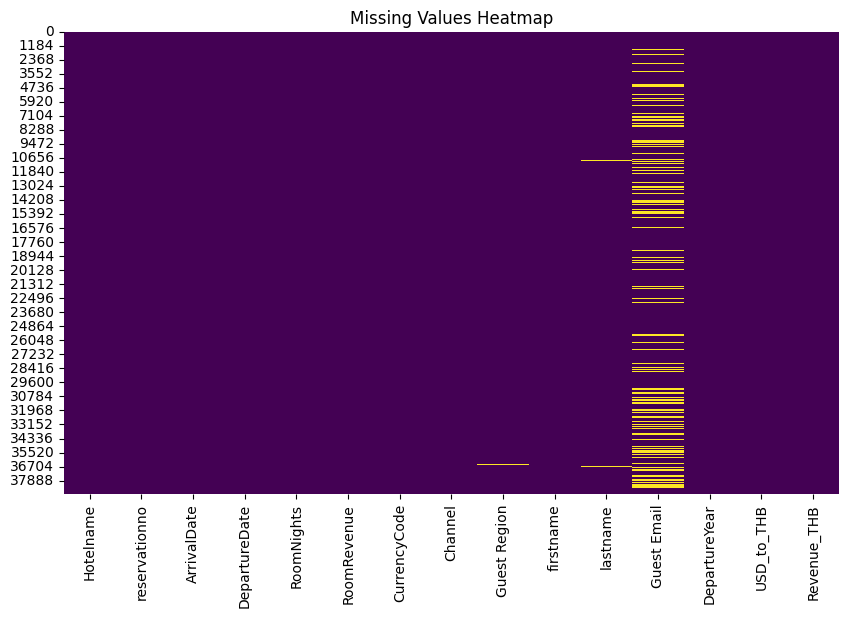

In [ ]:
# Visualize missing values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Display the count of missing values
print(missing_values)

Hotelname           0
reservationno       0
ArrivalDate         0
DepartureDate       0
RoomNights          0
RoomRevenue         0
CurrencyCode        0
Channel             0
Guest Region      168
firstname          31
lastname           98
Guest Email      9678
DepartureYear       0
USD_to_THB          0
Revenue_THB         0
dtype: int64


In [ ]:
unique_counts = {}
for column in merged_df.columns:
    unique_counts[column] = len(merged_df[column].unique())

unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique_Values_Count'])
print(unique_counts_df)

               Unique_Values_Count
Hotelname                        3
reservationno                39039
ArrivalDate                    728
DepartureDate                  728
RoomNights                      39
RoomRevenue                  19521
CurrencyCode                     2
Channel                          3
Guest Region                    11
firstname                      693
lastname                       389
Guest Email                  24706
DepartureYear                    2
USD_to_THB                     658
Revenue_THB                  21348
